# Exploring Disney Land Wait Time Data Set

In [1]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"

import sklearn.decomposition as skld

import matplotlib.pyplot as plt
import seaborn as sns

import imp



In [2]:
#import meta data
meta = pd.read_csv("disney.csv")

#import magic kingdom rides (wait times)
splash = pd.read_csv("splash_mountain.csv")
seven_dwarfs = pd.read_csv("7_dwarfs_train.csv")
pirates = pd.read_csv('pirates_of_caribbean.csv')


In [3]:
# First five rows of meta, five columns, # start date 2012
meta.iloc[0:5, 0:10]

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM
0,01/01/2012,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,5
1,01/02/2012,NaN,2,1,1,1,2012,CHRISTMAS,2,5
2,01/03/2012,NaN,3,2,1,1,2012,CHRISTMAS,3,0
3,01/04/2012,NaN,4,3,1,1,2012,CHRISTMAS,4,0
4,01/05/2012,NaN,5,4,1,1,2012,CHRISTMAS,5,0


In [4]:
# Dropping sactmin from magic world rides, then dropping NaN from spostmin

# Drop rows where wait time is not available (-999)
pirates = pirates[pirates.SPOSTMIN > 0]
seven_dwarfs = seven_dwarfs[seven_dwarfs.SPOSTMIN > 0]
splash = splash[splash.SPOSTMIN > 0]

splash.head() #has posted minutes for each ride

,date,datetime,SPOSTMIN,SACTMIN
0,01/01/2012,2012-01-01 10:31:00,30.0,NaN
1,01/01/2012,2012-01-01 10:40:00,30.0,NaN
3,01/01/2012,2012-01-01 12:02:00,30.0,NaN
5,01/01/2012,2012-01-01 12:38:00,35.0,NaN
6,01/01/2012,2012-01-01 12:44:00,25.0,NaN


In [5]:
#Merging each ride with meta_data, using date as key
meta_splash = pd.merge(splash, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)


In [6]:
#change NAs to 0 values
meta_splash = meta_splash.fillna(0)
#format date in a way that can be worked with
meta_splash['date'] = pd.to_datetime(meta_splash['date'])
meta_splash.head()

,date,datetime,SPOSTMIN,SACTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,2012-01-01,2012-01-01 10:31:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
1,2012-01-01,2012-01-01 10:40:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
2,2012-01-01,2012-01-01 12:02:00,30.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
3,2012-01-01,2012-01-01 12:38:00,35.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0
4,2012-01-01,2012-01-01 12:44:00,25.0,0.0,0,1,0,1,1,2012,...,1,1,15:45,0.0,Mickey's Jingle Jungle Parade,0.0,0,0,0,0


In [7]:
#skip run due to crashing for now
#meta_dwarfs = pd.merge(seven_dwarfs, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)
#meta_pirates = pd.merge(pirates, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

In [8]:
#find all posted wait times by day in meta_splash
sum_by_day = meta_splash.groupby('date')['SPOSTMIN'].mean()
#reset index to create dataframe columns
sum_by_day = sum_by_day.reset_index()
sum_by_day = pd.DataFrame(sum_by_day,columns=['date','SPOSTMIN'])


In [44]:
meta['DATE'] = pd.to_datetime(meta['DATE'])
#merge back with original meta set for daily weighted averages
meta_splash2 = pd.merge(sum_by_day, meta, left_on="date", right_on="DATE").drop('DATE', axis = 1)

# change month and day to names of month and day ie: 1 to Sunday, 1 to January
meta_splash2['DAY'] = meta_splash2['date'].dt.weekday_name
meta_splash2['MONTH'] = meta_splash2['date'].dt.month_name()

meta_splash2.head()





,date,SPOSTMIN,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,...,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN,DAY,MONTH
0,2012-01-01,37.727273,NaN,1,0,1,1,2012,CHRISTMAS PEAK,0,...,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN,Sunday,January
1,2012-01-02,43.750000,NaN,2,1,1,1,2012,CHRISTMAS,2,...,15:45,NaN,Mickey's Jingle Jungle Parade,NaN,0,NaN,NaN,NaN,Monday,January
2,2012-01-03,5.000000,NaN,3,2,1,1,2012,CHRISTMAS,3,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Tuesday,January
3,2012-01-04,17.142857,NaN,4,3,1,1,2012,CHRISTMAS,4,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Wednesday,January
4,2012-01-05,41.153846,NaN,5,4,1,1,2012,CHRISTMAS,5,...,15:45,NaN,Mickey's Jammin' Jungle Parade,NaN,0,NaN,NaN,NaN,Thursday,January


## Average Wait Time Per Month for Splash Mountain Ride



,month,SPOSTMIN
0,April,46.710143
1,August,46.546117
2,December,29.974987
3,February,36.623804
4,January,28.440102
5,July,52.756633
6,June,51.340613
7,March,49.761683
8,May,40.851204
9,November,25.806448


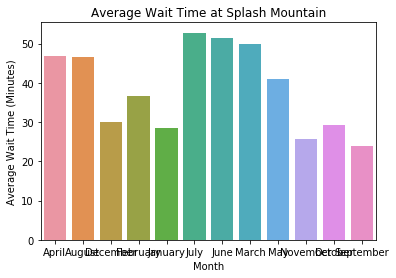

In [21]:
#aggregate by month
month_splash2 = meta_splash2.groupby(['MONTH'])['SPOSTMIN'].mean()
month_splash2 = month_splash2.reset_index()

ax = sns.barplot(x="", y = "SPOSTMIN", data = month_splash2)
ax.set(xlabel = 'Month', ylabel = 'Average Wait Time (Minutes)', title = 'Average Wait Time at Splash Mountain')

month_splash2




We see that on average wait times are the longest during peak summer months of July, June

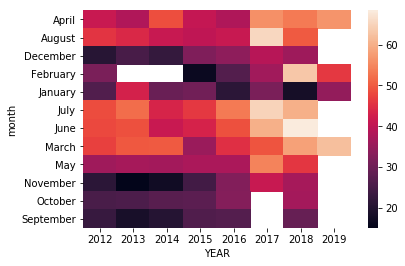

In [39]:
# Grouping by month and year

#aggregate by month
month_splash2 = meta_splash2.groupby(['month', 'YEAR'])['SPOSTMIN'].mean().reset_index()

month_splash2 = month_splash2.pivot("month", "YEAR", "SPOSTMIN")
ax = sns.heatmap(month_splash2)


## Average Wait Time Per Day From 2012-2019 For Splash Mountain

[Text(0, 0.5, 'Average Wait Time (Minutes)'),
 Text(0.5, 0, 'Day of Week'),
 Text(0.5, 1.0, 'Average Wait Time at Splash Mountain')]

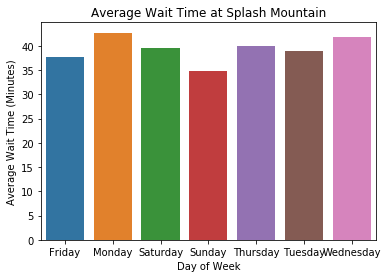

In [41]:
day_splash2 = meta_splash2.groupby('day')['SPOSTMIN'].mean()
day_splash2 = day_splash2.reset_index()

ax = sns.barplot(x="day", y = "SPOSTMIN", data = day_splash2)
ax.set(xlabel = 'Day of Week', ylabel = 'Average Wait Time (Minutes)', title = 'Average Wait Time at Splash Mountain')



## Time Series visualization

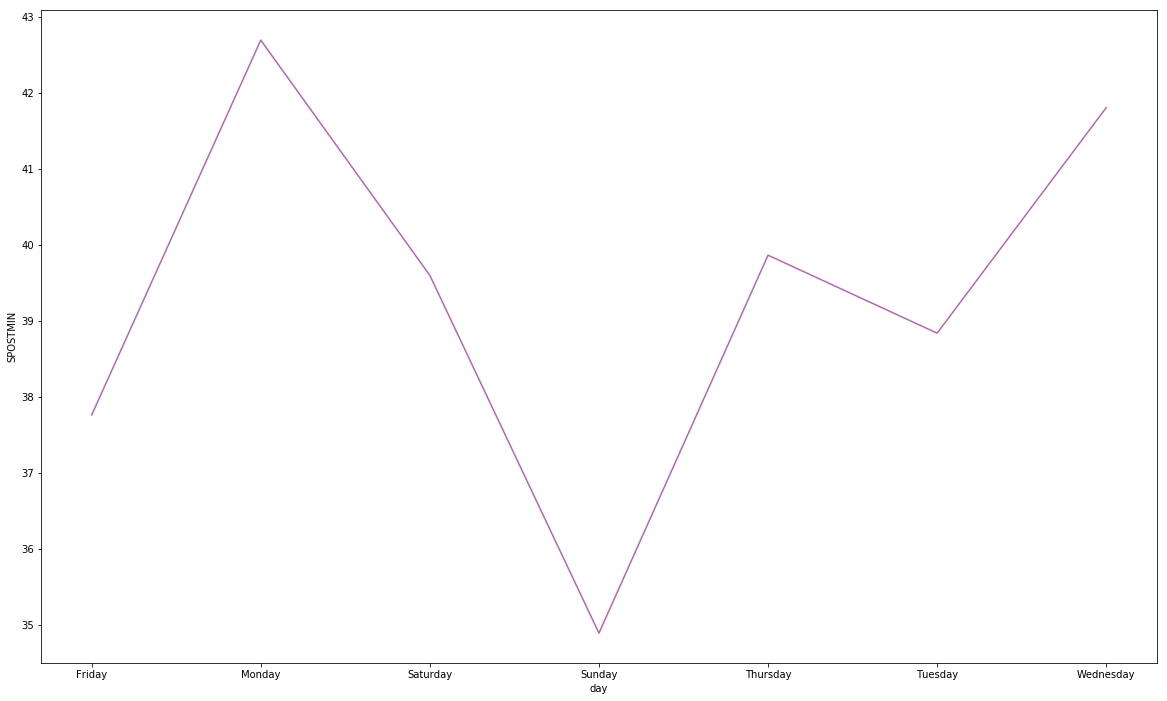

In [43]:
for f in ['SPOSTMIN']:
    plt.figure(figsize=(20,12))
    sns.lineplot(x='day', y=f, data=day_splash2, ci=95, n_boot=10000, color='purple', alpha=0.6)